In [1]:
# 连续输入4个字母，预测下一个字母
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN,Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
input_word = "abcde"
w_to_id = {
    "a":0,
    "b":1,
    "c":2,
    "d":3,
    "e":4
}
id_to_onehot = {
    0:[1., 0., 0., 0., 0.],
    1:[0., 1., 0., 0., 0.],
    2:[0., 0., 1., 0., 0.],
    3:[0., 0., 0., 1., 0.],
    4:[0., 0., 0., 0., 1.]
}
x_train = [
    [id_to_onehot[w_to_id['a']],id_to_onehot[w_to_id['b']],id_to_onehot[w_to_id['c']],id_to_onehot[w_to_id['d']]],
    [id_to_onehot[w_to_id['b']],id_to_onehot[w_to_id['c']],id_to_onehot[w_to_id['d']],id_to_onehot[w_to_id['e']]],
    [id_to_onehot[w_to_id['c']],id_to_onehot[w_to_id['d']],id_to_onehot[w_to_id['e']],id_to_onehot[w_to_id['a']]],
    [id_to_onehot[w_to_id['d']],id_to_onehot[w_to_id['e']],id_to_onehot[w_to_id['a']],id_to_onehot[w_to_id['b']]],
    [id_to_onehot[w_to_id['e']],id_to_onehot[w_to_id['a']],id_to_onehot[w_to_id['b']],id_to_onehot[w_to_id['c']]]
]
y_train = [
    # y不需要独热编码了
    w_to_id['e'],
    w_to_id['a'],
    w_to_id['b'],
    w_to_id['c'],
    w_to_id['d']
]
print("x_train:\n{}".format(x_train))
print("y_train:{}\n".format(y_train))

x_train:
[[[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0]], [[0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0]], [[0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0]]]
y_train:[4, 0, 1, 2, 3]



In [3]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

In [4]:
np.reshape(x_train,(len(x_train),4,5))
np.array(y_train)

array([4, 2, 1, 0, 3])

In [5]:
model = tf.keras.Sequential([
    # 具有3个记忆体的循环层，3是随意选的
    SimpleRNN(3),
    # 由于要映射到独热码编码，找到输出概率最大的字母，所以这里是5
    Dense(5,activation="softmax")    
])


In [6]:
model.compile(optimizer=Adam(0.01),loss=SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

In [7]:
checkpoint_save_path = "./checkpoint/rnn_onehot_4pre1.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print("----load the model-------")
    model.load_weights(checkpoint_save_path)


----load the model-------


In [8]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

In [9]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

Train on 5 samples
Epoch 1/100
5/5 [==============================] - 1s 160ms/sample - loss: 0.2451 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2412 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2375 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2338 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2302 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2268 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2234 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2200 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
5/5 [==================

Epoch 70/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1072 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1062 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1052 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1043 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1033 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.1024 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 24ms/sample - loss: 0.1015 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 6ms/sample - loss: 0.1006 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
5/5 [=============================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       multiple                  27        
_________________________________________________________________
dense (Dense)                multiple                  20        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [11]:
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

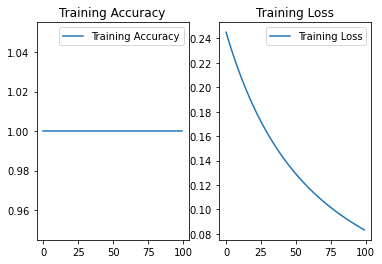

In [12]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [13]:
# predict
preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet\n")
    alphabet = [id_to_onehot[w_to_id[a]] for a in alphabet1]
    print("alphabeta:\n{}".format(alphabet))
    # 此处验证效果送入了一个样本，所以1
    alphabet = np.reshape(alphabet,(1,4,5))
    result = model.predict([alphabet])
    pred = np.argmax(result,axis=1)
    pred = int(pred)
    print(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of test alphabet:5
input test alphabet
abed
alphabeta:
[[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0]]
4
abed->e
input test alphabet
ccea
alphabeta:
[[0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 0.0]]
1
ccea->b
input test alphabet
cccc
alphabeta:
[[0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0]]
4
cccc->e
input test alphabet
abcd
alphabeta:
[[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0]]
4
abcd->e
input test alphabet
eeee
alphabeta:
[[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 1.0]]
0
eeee->a
